# TSNE Plots Using Gensim Model

This notebook plots a two-dimensional graph of similarities. It explores the idea that similarities between artists describe art-historical movements.

## Some movements according to Wikipedia

**Russian Avant Garde**

Kazimir Malevich, Aleksandra Ekster, Vladimir Tatlin, Wassily Kandinsky, David Burliuk, Alexander Archipenko

**Cubism**

Pablo Picasso and Georges Braque, joined by Jean Metzinger, Albert Gleizes, Robert Delaunay, Henri Le Fauconnier, and Fernand Léger

**Dada**

Hugo Ball, Marcel Duchamp, Emmy Hennings, Hans Arp, Sophie Taeuber-Arp, Raoul Hausmann, Hannah Höch, Johannes Baader, Tristan Tzara, Francis Picabia, Huelsenbeck, George Grosz, John Heartfield, Man Ray, Beatrice Wood, Kurt Schwitters, Hans Richter, Max Ernst, and Elsa von Freytag-Loringhoven 

**AbEx**

 Arshile Gorky, Franz Kline, Clyfford Still, Hans Hofmann, Willem de Kooning, Jackson Pollock

In [2]:
import gensim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [3]:
def tsne_plot_similar(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [4]:
model = gensim.models.Word2Vec.load('../data/models/moma-combos.model')

In [4]:
model.wv.vocab

{'berenicabbott': <gensim.models.keyedvectors.Vocab at 0x1a19582978>,
 'stuartdavi': <gensim.models.keyedvectors.Vocab at 0x1a19582b00>,
 'robertindiana': <gensim.models.keyedvectors.Vocab at 0x1a19582b38>,
 'joemalonei': <gensim.models.keyedvectors.Vocab at 0x1a19582b70>,
 'garriwinogrand': <gensim.models.keyedvectors.Vocab at 0x1a19582ba8>,
 'johnmarin': <gensim.models.keyedvectors.Vocab at 0x1a19582be0>,
 'dennioppenheim': <gensim.models.keyedvectors.Vocab at 0x1a19582a20>,
 'ruthorkin': <gensim.models.keyedvectors.Vocab at 0x1a19582a58>,
 'philippearlstein': <gensim.models.keyedvectors.Vocab at 0x1a195829b0>,
 'irvpenn': <gensim.models.keyedvectors.Vocab at 0x1a19582c18>,
 'josephpennel': <gensim.models.keyedvectors.Vocab at 0x1a19582da0>,
 'charlsheeler': <gensim.models.keyedvectors.Vocab at 0x1a19582dd8>,
 'johnsloan': <gensim.models.keyedvectors.Vocab at 0x1a19582eb8>,
 'susansmith': <gensim.models.keyedvectors.Vocab at 0x1a19582ef0>,
 'joansnitzer': <gensim.models.keyedvectors.

In [5]:
keys = ['arshilgorki']

embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    similarities = model.wv.most_similar(word, topn=53)
    for similar in similarities:
        words.append(similar[0])
        embeddings.append(model.wv.get_vector(similar[0]))

    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [6]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

tsne_model_2d = TSNE(perplexity=5, 
                     learning_rate=500,
                     n_components=2, 
                     init='pca', 
                     n_iter=3500, 
                     random_state=32)

embeddings_2d = np.array(
    tsne_model_2d.fit_transform(
        embedding_clusters.reshape(
            n * m, k))).reshape(n, m, 2)

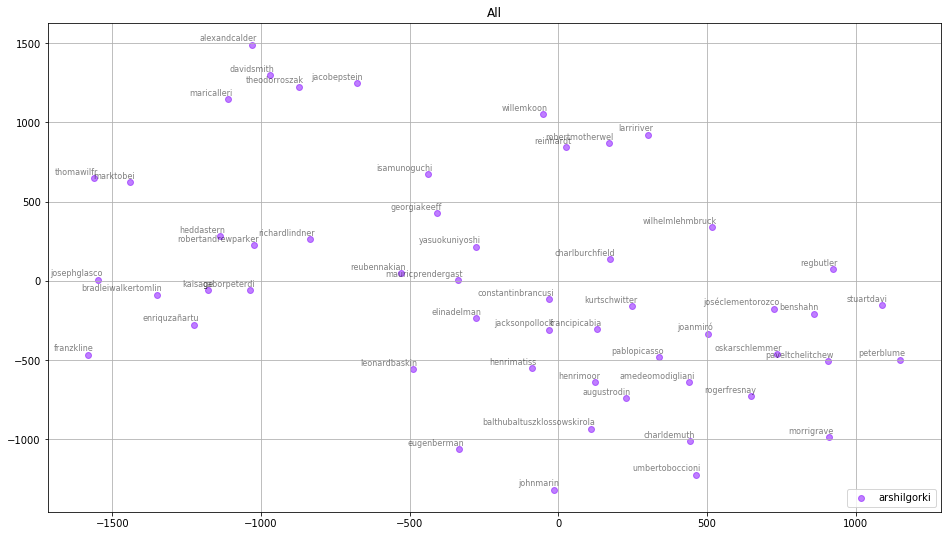

In [7]:
filename = f"plots/{'-'.join([n.split('_')[-1] for n in keys])}.png"

tsne_plot_similar('All', keys, embeddings_2d, word_clusters, 0.5, filename)